In [105]:
import pandas as pd
import pickle

import seaborn as sns

import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , learning_curve
from sklearn.metrics import confusion_matrix , roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from yellowbrick.classifier import ConfusionMatrix
from imblearn.over_sampling import SMOTE 
import mysql.connector
import pymysql
import sqlite3
from sqlalchemy import create_engine



In [1]:
data_base = mysql.connector.connect(host="localhost" , user="root" , password="Yugioh11." , database="loan_prediction_file_rouge")
cur = data_base.cursor(buffered=True)
query = "select * from loan_prediction"
cur.execute(query)
tables = cur.fetchone()
#connect sql database to be used has dataframe 



NameError: name 'mysql' is not defined

In [107]:
df = pd.read_sql(query , data_base)
df
#sql dataframe

,MyUnknownColumn,Id,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,NaN,LP000001,1,1,0,1,0,2000,1900.0,700.0,360.0,0.0,0,1
1,1.0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2.0,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3.0,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4.0,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,609.0,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
477,610.0,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
478,611.0,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
479,612.0,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [108]:

df = df.drop('MyUnknownColumn' , axis=1)


In [109]:
df = df.drop('Id' , axis=1)

In [110]:
categ = ["Gender" , "Dependents",  "Married" , "Education" , "Self_Employed" , "Property_Area" , "Loan_Status"]
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)


In [111]:

X = df.drop(["Loan_Status" ], axis=1)
# X is the dataframe without the target 

y = df.Loan_Status
#y is the target 

In [112]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#we are splitting the dataset with train test split a test size of 20 percent of test and 80 percent of train 


In [113]:

from sklearn.decomposition import PCA
preprocessing_ss = Pipeline(steps=[
    ('standard scaler', StandardScaler())])

model = linear_model.LogisticRegression()
#the dataset is really umbalanced so i ill need the smote to compare once i found a decent model 
#standard scaler and min max scaler will be for the other models

In [114]:
pipeline_log = Pipeline(steps = [['preprocessing_Standard_scaler'  , preprocessing_ss],
                                ['LogisticRegression', model]
                                     ])

In [115]:
pipeline_log.fit(X_train , y_train.values)

Pipeline(steps=[('preprocessing_Standard_scaler',
                 Pipeline(steps=[('standard scaler', StandardScaler())])),
                ['LogisticRegression', LogisticRegression()]])

In [116]:
pipeline_log.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing_Standard_scaler', 'LogisticRegression', 'preprocessing_Standard_scaler__memory', 'preprocessing_Standard_scaler__steps', 'preprocessing_Standard_scaler__verbose', 'preprocessing_Standard_scaler__standard scaler', 'preprocessing_Standard_scaler__standard scaler__copy', 'preprocessing_Standard_scaler__standard scaler__with_mean', 'preprocessing_Standard_scaler__standard scaler__with_std', 'LogisticRegression__C', 'LogisticRegression__class_weight', 'LogisticRegression__dual', 'LogisticRegression__fit_intercept', 'LogisticRegression__intercept_scaling', 'LogisticRegression__l1_ratio', 'LogisticRegression__max_iter', 'LogisticRegression__multi_class', 'LogisticRegression__n_jobs', 'LogisticRegression__penalty', 'LogisticRegression__random_state', 'LogisticRegression__solver', 'LogisticRegression__tol', 'LogisticRegression__verbose', 'LogisticRegression__warm_start'])

In [117]:
print("accuracy train : %.3f"%pipeline_log.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_log.score(X_test , y_test))


accuracy train : 0.812
accuracy test : 0.804


In [118]:
y_pred_log = pipeline_log.predict(X_test)
y_pred_log

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [119]:
print(classification_report(y_test, y_pred_log))
#we are going to base or result on the recall we will need the 0 to be really low and the 1 to be really hight
#this is because in a bank you don't wan't to predict people like that : they can get a loan but actually they shouldn't be able to get it
#0 is the number of people that or not getting it but if the score is high this means a lot of people that shouldn't get the loan will get it 
#1 needs to be high because they are the good prediction of people who can correctly get the loan

              precision    recall  f1-score   support

           0       0.84      0.50      0.63        32
           1       0.79      0.95      0.87        65

    accuracy                           0.80        97
   macro avg       0.82      0.73      0.75        97
weighted avg       0.81      0.80      0.79        97



<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

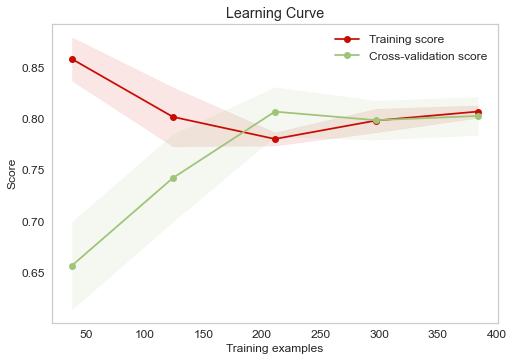

In [120]:
plot_learning_curve(pipeline_log, X , y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

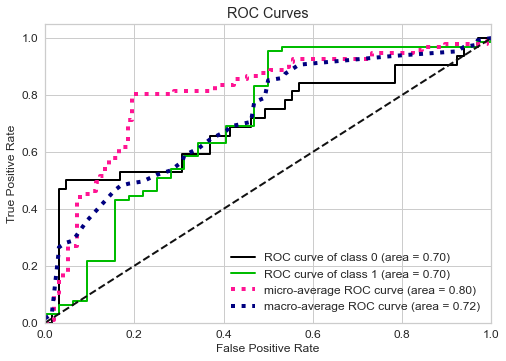

In [121]:
pipeline_log.fit(X_train, y_train)
y_probas = pipeline_log.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

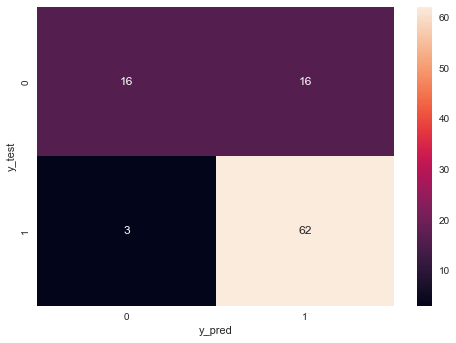

In [122]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()
#what we need to reduce is the false positive on the top right overwhise it's decent but not great

In [123]:
pred = pipeline_log.predict(X_test)

In [124]:
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [131]:
X_test['proba_ml'] =pipeline_log.score(X_train , y_train)
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predict,proba_ml
73,1,1,2,0,0,6250,5654.0,188.0,180.0,1.0,1,1,0.8125
415,1,0,0,1,0,6783,0.0,130.0,360.0,1.0,1,1,0.8125
392,0,0,0,0,0,3159,0.0,100.0,360.0,1.0,1,1,0.8125
278,1,1,0,1,0,3000,1666.0,100.0,480.0,0.0,2,0,0.8125
400,1,1,2,0,0,3283,2035.0,148.0,360.0,1.0,2,1,0.8125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,1,1,1,0,0,2014,2925.0,113.0,360.0,1.0,2,1,0.8125
409,1,1,3,0,1,5677,1424.0,100.0,360.0,1.0,0,1,0.8125
25,1,0,1,0,1,4692,0.0,106.0,360.0,1.0,0,1,0.8125
265,0,0,0,0,0,2378,0.0,46.0,360.0,1.0,0,1,0.8125


In [132]:

X_test['predict'] = pred
X_test


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predict,proba_ml
73,1,1,2,0,0,6250,5654.0,188.0,180.0,1.0,1,1,0.8125
415,1,0,0,1,0,6783,0.0,130.0,360.0,1.0,1,1,0.8125
392,0,0,0,0,0,3159,0.0,100.0,360.0,1.0,1,1,0.8125
278,1,1,0,1,0,3000,1666.0,100.0,480.0,0.0,2,0,0.8125
400,1,1,2,0,0,3283,2035.0,148.0,360.0,1.0,2,1,0.8125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,1,1,1,0,0,2014,2925.0,113.0,360.0,1.0,2,1,0.8125
409,1,1,3,0,1,5677,1424.0,100.0,360.0,1.0,0,1,0.8125
25,1,0,1,0,1,4692,0.0,106.0,360.0,1.0,0,1,0.8125
265,0,0,0,0,0,2378,0.0,46.0,360.0,1.0,0,1,0.8125


In [ ]:
X_test

In [133]:
#data_base = mysql.connector.connect(host="localhost" , user="root" , password="Yugioh11." , database="loan_prediction_file_rouge")
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(
    host="localhost" , user="root" , pw="Yugioh11." , db="loan_prediction_file_rouge"))
conn = engine.connect()
X_test.to_sql('ml_pred', conn, if_exists='replace', index = False)

In [ ]:
with open('model_pkl.pickle', 'wb') as files:
    pickle.dump(pipeline_log, files)